In [ ]:
!pip install --upgrade -q google-cloud-aiplatform
!gcloud auth application-default login
!gcloud auth application-default set-quota-project 'questdom'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.3 MB/s eta 0:00:00
Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=eegBCl4fOOHvyZJb5HAXe6YnOp785O&prompt=consent&token_usage=remote&access_type=offline&code_challenge=mZqzow-Izi-vGQCz6zGz1_mhHklOFJ3YQvx1Qpe_LBI&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AQlEd8zgrDXK4AvWWguZ57zwP-GK7X9QWRDIpJC2UPk2t29V9ntPZ47i9rAeX5NzWlxBxQ

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will b

In [ ]:
! pip install -q langchain langchain-google-vertexai
! pip install -qU "langchain-chroma>=0.1.2"
! pip install -qU langchain-community
! pip install -q firecrawl-py
# ! pip install -q selenium
# ! apt update
# ! apt install chromium-chromedriver


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ..

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import re
import os
import getpass
import time
import requests
from PIL import Image
from io import BytesIO
import base64
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models
from langchain_google_vertexai import ChatVertexAI
from langchain_google_vertexai import VertexAI
from langchain_community.document_loaders import FireCrawlLoader
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_google_vertexai import VertexAIEmbeddings
from langchain_text_splitters import MarkdownHeaderTextSplitter
from langchain_core.messages import AIMessage
from langchain_core.messages import HumanMessage
from langchain_chroma import Chroma
from uuid import uuid4



import numpy as np


In [ ]:
vertexai.init(project="questdom", location="us-central1")

llm = ChatVertexAI(model="gemini-1.5-flash", temperature = 0.3, max_tokens = 1024)

embeddings = VertexAIEmbeddings(model_name="text-embedding-004")

llm.invoke('How many "r" is there in Strawberry?')


AIMessage(content='There are **three** "r"s in the word "Strawberry". \n', response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE'}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE'}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE'}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability_label': 'NEGLIGIBLE', 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE'}], 'usage_metadata': {'prompt_token_count': 10, 'candidates_token_count': 17, 'total_token_count': 27}, 'finish_reason': 'STOP'}, id='run-f5a3cadd-21d5-4441-82b5-87247d3e6baa-0', usage_metadata={'input_tokens': 10, 'output_tokens': 17, 'total_tokens': 27})

In [ ]:
def get_product_info(link):
  link_comps = str(link.split('/'))
  parser = JsonOutputParser()
  prompt = PromptTemplate(
    template="Extract the product_name and product_code from the list provided.\n{format_instructions}\n{link_comps}\n",
    input_variables=["link_comps"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)
  chain = prompt | llm | parser

  response = chain.invoke({"link_comps": link_comps})

  return response




def setup_links(prod_dict):
    product_name = prod_dict['product_name']
    product_code = prod_dict['product_code']
    pages = np.arange(1,4)

    page_links =[f'https://www.walmart.com/reviews/product/{product_code}?page={page_no}' for page_no in pages]

    return page_links


def extract_reviews(page_links):
  doc_lst = list()
  if "FIRECRAWL_API_KEY" not in os.environ:
    os.environ["FIRECRAWL_API_KEY"] = getpass.getpass("Enter your Firecrawl API key: ")
  for page_link in page_links:
    time.sleep(2)
    print('-'*20)
    print(f'Scraping reviews from:{page_link}')

    loader = FireCrawlLoader(url=page_link, mode="scrape")
    docs = loader.load()
    doc_lst.append(docs)
    print('Extraction complete')

  return doc_lst



def split_docs(doc_lst):
  fin_docs = list()
  headers_to_split_on = [
      ("#", "Header 1"),
      ("##", "Header 2"),
      ("###", "Header 3"),
      ("####", "Header 4")
  ]
  markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on,strip_headers= False)

  for i in range(0, len(doc_lst)):
    md_header_splits = markdown_splitter.split_text(doc_lst[i][0].page_content)
    fin_docs.append(md_header_splits)
  return fin_docs

def split_into_batches(lst, batch_size=5):
    return [lst[i:i + batch_size] for i in range(0, len(lst), batch_size)]


def embed_and_store(doc_lsts,product_code):
  print(f'Length of doc_lst: {[len(doc_lsts[i]) for i in range(0,len(doc_lsts))]}')
  print(f'total items: {sum([len(doc_lsts[i]) for i in range(0,len(doc_lsts))])}')

  vector_store = Chroma(
    collection_name=f"{product_code}_reviews",
    embedding_function=embeddings,
    persist_directory=f"./product_reviews_hp")

  for doc_lst in doc_lsts:
    if len(doc_lst) > 4:
      batch_docs = split_into_batches(doc_lst,4)
      print(f'Length of batch_docs: {[len(batch_docs[i]) for i in range(0,len(batch_docs))]}')
      for doc in batch_docs:
        uuids = [str(uuid4()) for _ in range(len(doc))]
        time.sleep(30)
        vector_store.add_documents(documents = doc, ids=uuids)
    else:
        uuids = [str(uuid4()) for _ in range(len(doc_lst))]
        vector_store.add_documents(documents = doc_lst, ids=uuids)

  return vector_store

In [ ]:
product_links = ['https://www.walmart.com/ip/Hyper-Tough-2000-PSI-at-1-2-GPM-120-V-60HZ-1800W-Electric-Powered-Cold-Water-Pressure-Washer/5103462911',
                 'https://www.walmart.com/ip/Beats-Studio3-Wireless-Noise-Cancelling-Headphones-with-Apple-W1-Headphone-Chip-Matte-Black/817684947',
                 'https://www.walmart.com/ip/Clean-Clear-Morning-Burst-Oil-Free-Face-Wash-12-fl-oz/828264957?classType=REGULAR']

prod_dict = get_product_info(product_links[1])
prod_dict

rev_links = setup_links(prod_dict)

rev_docs = extract_reviews(rev_links)

{'product_name': 'Beats Studio3 Wireless Noise Cancelling Headphones with Apple W1 Headphone Chip Matte Black',
 'product_code': '817684947'}

Enter your Firecrawl API key: ··········
--------------------
Scraping reviews from:https://www.walmart.com/reviews/product/817684947?page=1
Extraction complete
--------------------
Scraping reviews from:https://www.walmart.com/reviews/product/817684947?page=2
Extraction complete
--------------------
Scraping reviews from:https://www.walmart.com/reviews/product/817684947?page=3
Extraction complete


In [ ]:
rev_splitted_docs = split_docs(rev_docs)

vectordb = embed_and_store(rev_splitted_docs, prod_dict['product_code'])


Length of doc_lst: [11, 11, 21]
total items: 43
Length of batch_docs: [4, 4, 3]
Length of batch_docs: [4, 4, 3]
Length of batch_docs: [4, 4, 4, 4, 4, 1]


In [ ]:
def extract_img_links(document, keyword):
    # Escape the keyword to handle any special characters
    escaped_keyword = re.escape(keyword)
    # Regex pattern to find URLs that contain the keyword
    pattern = r'https?://' + escaped_keyword + r'[^\s]*'
    matches = re.findall(pattern, document)
    return matches

def answer_questions(question):

  parser = StrOutputParser()

  retriever = vectordb.as_retriever(search_type="mmr", search_kwargs={"k": 4, "fetch_k": 5})

  prompt = PromptTemplate(
    template='''You are a expert customer experience analyst, based on the given customer reviews, answer the questions, and also
                include image links if available from the reviews. The output should be strictly in a markdown format specifically for
                image hyperlinks which should have '!' tag in front

                Reviews : {context}

                Question: {question}''')

  retrieval_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | parser)

  response = retrieval_chain.invoke(question)
  return response








In [ ]:
response = answer_questions('Are generally customers satisfied with the products? if not what are their main concerns?')
display(Markdown(f'{response}'))

Based on the provided customer reviews, it appears that customers are **not generally satisfied** with the product. 

Here are the main concerns:

* **Product Defects:**  Multiple reviews mention receiving broken or defective products right out of the package. For example, one customer states "it was horrible i opened my beats and it was broke" and includes an image of the broken product: ![Image 1 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-7e89/k2-_d1591bdd-814c-4275-858b-a1a72b84e205.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
* **Quality Issues:** Another customer reports experiencing static and volume control issues within 3 months of purchase. They include multiple images showcasing the problem: 
    * ![Image 1 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-9e57/k2-_17c7764c-f9bc-4820-9a63-2ee65baf4ba9.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff)
    * ![Image 2 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-524c/k2-_17adce63-7e49-43bf-8d9e-b746213ba790.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff)
    * ![Image 3 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-66d8/k2-_f3c9547c-6bc6-46c3-a402-183ff02fdf2d.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff)

While there is one positive review, the overwhelming majority express dissatisfaction with the product due to quality and reliability issues. 


In [ ]:
print(response)

Based on the provided customer reviews, it appears that customers are **not generally satisfied** with the product. 

Here are the main concerns:

* **Product Defects:**  Several customers reported receiving broken headphones right out of the package.  
    *  [Image of broken headphones](https://i5.walmartimages.com/dfw/6e29e393-7e89/k2-_d1591bdd-814c-4275-858b-a1a72b84e205.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
* **Quality Issues:**  One customer experienced static and volume control issues within 3 months of purchase.
    * [Image 1 of static issue](https://i5.walmartimages.com/dfw/6e29e393-9e57/k2-_17c7764c-f9bc-4820-9a63-2ee65baf4ba9.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff)
    * [Image 2 of static issue](https://i5.walmartimages.com/dfw/6e29e393-524c/k2-_17adce63-7e49-43bf-8d9e-b746213ba790.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff)
    * [Image 3 of static issue](https://i5.walmartimages.com/dfw/6e29e393-66d8/k2-_f3c9547c-6bc6-46c3-a402-183ff02fdf2d.v1.bin?

In [ ]:
from IPython.display import display, Markdown, Latex, Image


## Customers who received damaged products:

Based on the provided customer reviews, here are the customers who received damaged products:

* **amiel:**  "it was horrible i opened my beats and it was broke" -  This customer received broken headphones. 
    * **Image:** ![Image 1 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-7e89/k2-_d1591bdd-814c-4275-858b-a1a72b84e205.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
* **Gaia:** "The order was marked picked up 30mins before I made it to the store. The box had no stickers on the outside to keep it sealed. When I opened the box there were no stickers on the headphones either. I found stickers that had already been peeled, stuck to the inside part of the box. The ear pads also had a small stain, and the outside part of the headphones have hand prints. Also when I activated the Bluetooth, the headphones popped up on my phone with someone else’s name." - This customer received a used item with signs of damage and previous use. 
    * **Images:** 
        * ![Image 1 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-ff24/k2-_c0edce56-8821-4340-82cc-acca4bcec016.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
        * ![Image 2 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-19fe/k2-_30831d63-05ee-4308-9c09-a9d9ac5acf2c.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
        * ![Image 1 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-2ec9/k2-_5ba2b3c4-5dae-4f37-a4b0-47571e982334.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
        * ![Image 2 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-5c74/k2-_a67d9779-926c-4a85-a01c-43b06e810fe8.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
        * ![Image 3 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-6641/k2-_25cb5308-efc0-49a1-905d-a3ed8c0f70fa.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
        * ![Image 4 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-5b06/k2-_281e08db-46b1-4b3a-a771-e6535ac381fc.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff) 
        * ![Image 5 of customer photos](https://i5.walmartimages.com/dfw/6e29e393-1682/k2-_bf98ba7d-42c2-4127-b11e-e87a9b53d757.v1.bin?odnWidth=150&odnHeight=150&

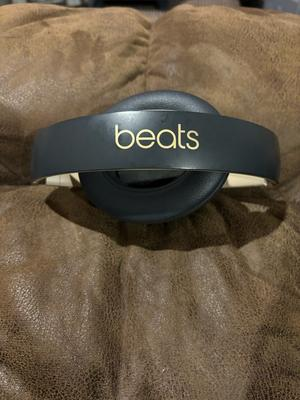

In [ ]:
link = ' https://i5.walmartimages.com/dfw/6e29e393-9e57/k2-_17c7764c-f9bc-4820-9a63-2ee65baf4ba9.v1.bin?odnWidth=150&odnHeight=150&odnBg=ffffff'



def get_image_from_url(url):
    # Fetch the image from the URL
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Convert the bytes to a PIL Image object
    img = Image.open(BytesIO(response.content))
    return img

# Example usage:

image = get_image_from_url(link)

# Display the image (this works in Jupyter notebooks)
display(image) # For standalone display


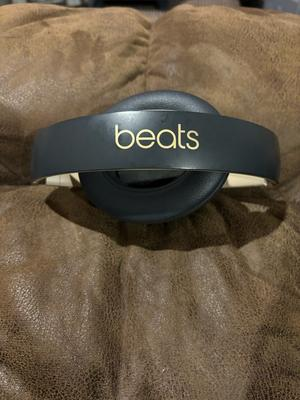

Hi 
None


In [ ]:
print(answer_questions('What is the average rating of the headphones?'))

The average rating of the Beats Studio3 headphones is **4.7 out of 5 stars**. This information is explicitly stated in the second document provided. 



### Multimodal RAG

In [ ]:
# def extract_img_links(document, keyword):
#     # Escape the keyword to handle any special characters
#     escaped_keyword = re.escape(keyword)
#     # Regex pattern to find URLs that contain the keyword
#     pattern = r'https?://' + escaped_keyword + r'[^\s]*'
#     matches = re.findall(pattern, document)
#     return matches

# img_lst = extract_img_links(rev_docs[0][0].page_content, 'i5.walmartimages.com')
# img_lst = [link[:-1] for link in img_lst]

# def encode_image(image_url):
#     """Getting the base64 string from an image URL"""
#     # Send a GET request to the URL
#     response = requests.get(image_url)
#     # Ensure the request was successful
#     if response.status_code == 200:
#         # Convert the image content to base64
#         return base64.b64encode(response.content).decode("utf-8")
#     else:
#         raise Exception(f"Failed to retrieve image from {image_url}")

# def image_summarize(img_base64, prompt):
#     """Make image summary"""

#     msg = llm.invoke(
#         [
#             HumanMessage(
#                 content=[
#                     {"type": "text", "text": prompt},
#                     {
#                         "type": "image_url",
#                         "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
#                     },
#                 ]
#             )
#         ]
#     )
#     return msg.content

# def generate_img_summaries(image_list):
#     """
#     Generate summaries and base64 encoded strings for images
#     path: Path to list of .jpg files extracted by Unstructured
#     """

#     # Store base64 encoded images
#     img_base64_list = []

#     # Store image summaries
#     image_summaries = []

#     # Prompt
#     prompt = """You are an assistant tasked with summarizing images for retrieval. \
#     These summaries will be embedded and used to retrieve the raw image. \
#     Give a concise summary of the image that is well optimized for retrieval."""

#     # Apply to images
#     img_count = 0
#     for img_file in image_list:
#       time.sleep(55)
#       base64_image = encode_image(img_file)
#       img_base64_list.append(base64_image)

#       image_summaries.append(image_summarize(base64_image, prompt))
#       img_count+=1
#       print(f'Img summarized {img_count}')
#     return img_base64_list, image_summaries




